*Макарова М.К. 6132-010402D*

# Задание:
1. Загрузить датасет WINE.
2. Подготовить выборки: обучающую 70% и тестовую 30%.
3. Построить указанные в задании классификаторы.
4. Применить указанные классификаторы к каждой паре из указанных в варианте задания признаков.
5. Построить разделяющие границы для каждого классификатора и каждой пары признаков.
6. Выбрать наилучшую комбинацию пару признаков и классификатора.
7. Сделать вывод.
8. Все результаты классификации и вывод записать в качестве ответа в текстовое поле. В качестве ответа также разместить ipynb файл.
**Классификатор 1 - К-ближайших соседей (К=3), Классификатор 2 - Байес; Признаки: flavanoids , proanthocyanins , nonflavanoid_phenols**


In [44]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [45]:
#Загрузка датасета WINE и выбор признаков согласно варианту
wine_data = load_wine(as_frame=True)
X = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
y = wine_data.target

selected_features = ['flavanoids', 'proanthocyanins', 'nonflavanoid_phenols']
X_selected = X[selected_features]

In [46]:
#Подготовка выборки: обучающая 70% и тестовая 30%
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [47]:
#Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
#Построение классификаторов и их применение к каждой паре из указанных в варианте задания признаков
#К-ближайших соседей
knn = KNeighborsClassifier(n_neighbors=3)

#Байес
nb = GaussianNB()

pairs_of_features = [('flavanoids', 'proanthocyanins'),
                     ('flavanoids', 'nonflavanoid_phenols'),
                     ('proanthocyanins', 'nonflavanoid_phenols')]

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=selected_features)

In [49]:
#Функция для построения разделяющих границ
def boundaries(X, y, model, ax, title):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_title(title)

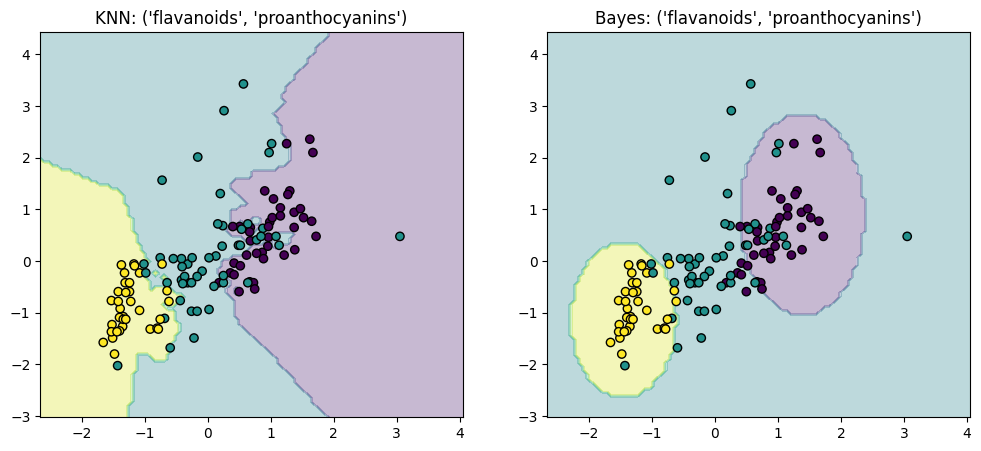

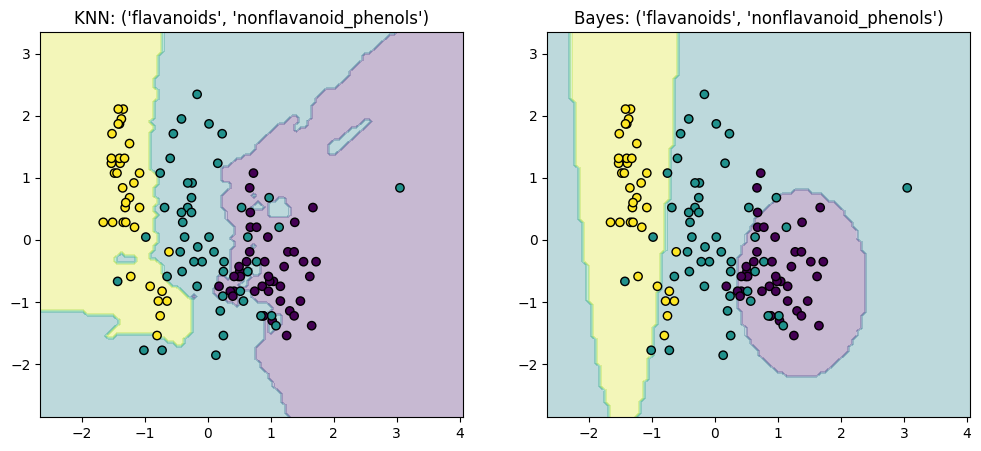

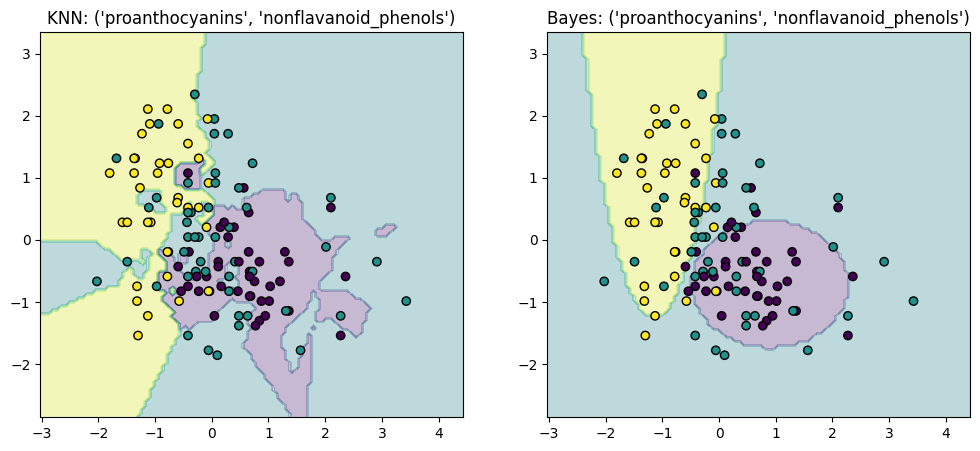


Пара признаков: ('flavanoids', 'proanthocyanins')
KNN Accuracy: 0.76
Bayes Accuracy: 0.74
------------------------------
Пара признаков: ('flavanoids', 'nonflavanoid_phenols')
KNN Accuracy: 0.72
Bayes Accuracy: 0.83
------------------------------
Пара признаков: ('proanthocyanins', 'nonflavanoid_phenols')
KNN Accuracy: 0.44
Bayes Accuracy: 0.61
------------------------------
Наилучшая комбинация:
Пара признаков: ('flavanoids', 'nonflavanoid_phenols')
Классификатор: Bayes
Точность: 0.83


In [50]:
#Применение указанных классификаторов к каждой паре из указанных в варианте задания признаков и построение разделяющих границ
#Выбор наилучшей комбинации пары признаков и классификатора
results = {}
best_combination = {'pair': None, 'classifier': None, 'accuracy': 0}

for pair in pairs_of_features:
    X_train_pair = X_train_scaled_df[list(pair)]
    X_test_pair = X_test_scaled_df[list(pair)]

    knn.fit(X_train_pair, y_train)
    y_pred_knn = knn.predict(X_test_pair)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)

    nb.fit(X_train_pair, y_train)
    y_pred_nb = nb.predict(X_test_pair)
    accuracy_nb = accuracy_score(y_test, y_pred_nb)

    results[pair] = {'KNN Accuracy': accuracy_knn, 'Bayes Accuracy': accuracy_nb}

    if accuracy_knn > best_combination['accuracy']:
        best_combination['pair'] = pair
        best_combination['classifier'] = 'KNN'
        best_combination['accuracy'] = accuracy_knn

    if accuracy_nb > best_combination['accuracy']:
        best_combination['pair'] = pair
        best_combination['classifier'] = 'Bayes'
        best_combination['accuracy'] = accuracy_nb

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    boundaries(X_train_pair, y_train, knn, axes[0], f'KNN: {pair}')
    boundaries(X_train_pair, y_train, nb, axes[1], f'Bayes: {pair}')

    plt.show()

print()
for pair in results:
    print(f"Пара признаков: {pair}")
    print(f"KNN Accuracy: {results[pair]['KNN Accuracy']:.2f}")
    print(f"Bayes Accuracy: {results[pair]['Bayes Accuracy']:.2f}")
    print("-" * 30)

print("Наилучшая комбинация:")
print(f"Пара признаков: {best_combination['pair']}")
print(f"Классификатор: {best_combination['classifier']}")
print(f"Точность: {best_combination['accuracy']:.2f}")